In [2]:
import torch
import matplotlib.pyplot as plt
import torch.distributions as dist

### Bernoulli Distribution

The Bernoulli distribution is a discrete probability distribution for a random variable which takes the value 1 with probability $ p $ and the value 0 with probability $ 1 - p $. It is the simplest distribution and is used to model a single trial with two possible outcomes: success (1) and failure (0).

#### Key Parameters
- **p**: The probability of success (1).

#### Probability Mass Function (PMF)
The probability mass function of a Bernoulli distribution is given by:
$ P(X = x) = 
\begin{cases} 
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 
\end{cases}
$
where $ x $ is the outcome of the trial.

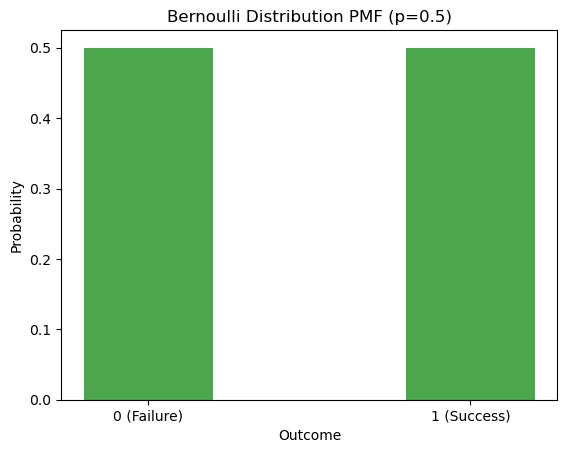

In [16]:
# Bernoulli distribution
bernoulli = dist.Bernoulli((torch.tensor([0.5])))

# Possible outcomes
x = torch.tensor([0, 1], dtype=torch.float32)

# Calculate the PMF for each outcome
pmf = bernoulli.probs

# Plot the PMF
plt.bar(x.numpy(), pmf.numpy(), width=0.4, color='green', alpha=0.7)
plt.xticks([0, 1], ['0 (Failure)', '1 (Success)'])
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution PMF (p=0.5)')
plt.show()

#### Important Statistics
- **Mean (Expected Value)**: $ \mu = p $
- **Variance**: $ \sigma^2 = p \cdot (1 - p) $
- **Standard Deviation**: $ \sigma = \sqrt{p \cdot (1 - p)} $

In [25]:
samples = [bernoulli.sample() for _ in range(1000)]
print(f"Mean: {torch.mean((torch.stack(samples)))}")
print(f"Varience: {torch.var((torch.stack(samples)))}")
print(f"Standard deviation: {torch.std((torch.stack(samples)))}")

Mean: 0.49900001287460327
Varience: 0.2502492368221283
Standard deviation: 0.5002492070198059


### Normal Distribution

The normal distribution, also known as the Gaussian distribution, is a continuous probability distribution characterized by its bell-shaped curve. It is defined by two parameters: the mean (μ) and the standard deviation (σ).

#### Key Parameters
- **μ (mu)**: The mean or expectation of the distribution.
- **σ (sigma)**: The standard deviation, which measures the spread or dispersion of the distribution.

#### Probability Density Function (PDF)
The probability density function of a normal distribution is given by:
$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $


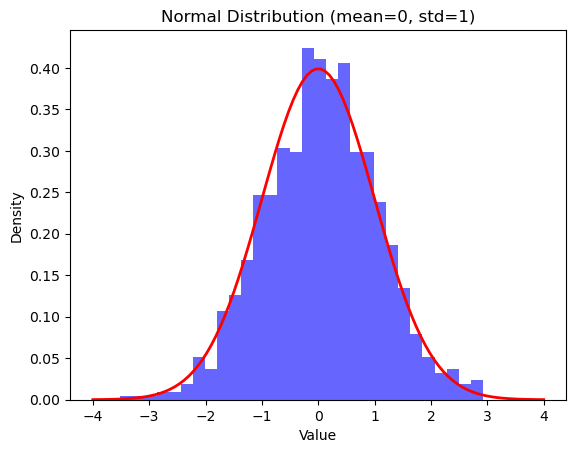

In [32]:
# Normal distribution
normal = dist.Normal(torch.tensor([0.0]), torch.tensor([1.0]))

samples = [normal.sample() for _ in range(1000)]

# Plot the histogram of the samples
plt.hist(torch.stack(samples).numpy(), bins=30, density=True, alpha=0.6, color='blue')

# Plot the PDF of the normal distribution
x = torch.linspace(-4, 4, 100)
pdf = torch.exp(normal.log_prob(x))
plt.plot(x.numpy(), pdf.numpy(), 'r', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution (mean=0, std=1)')
plt.show()

In [33]:
print(f"Mean: {torch.mean(torch.stack(samples))}")
print(f"Variance: {torch.var(torch.stack(samples))}")
print(f"Standard Deviation: {torch.std(torch.stack(samples))}")

Mean: 0.04822928458452225
Variance: 1.010208010673523
Standard Deviation: 1.0050910711288452


### Binomial Distribution

The binomial distribution is a discrete probability distribution that describes the number of successes in a fixed number of independent Bernoulli trials, each with the same probability of success.

#### Key Parameters
- **n**: The number of trials.
- **p**: The probability of success in each trial.

#### Probability Mass Function (PMF)
The probability mass function of a binomial distribution is given by:
$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} $
where:
- $\binom{n}{k}$ is the binomial coefficient, representing the number of ways to choose  $k$ successes from $n$ trials.

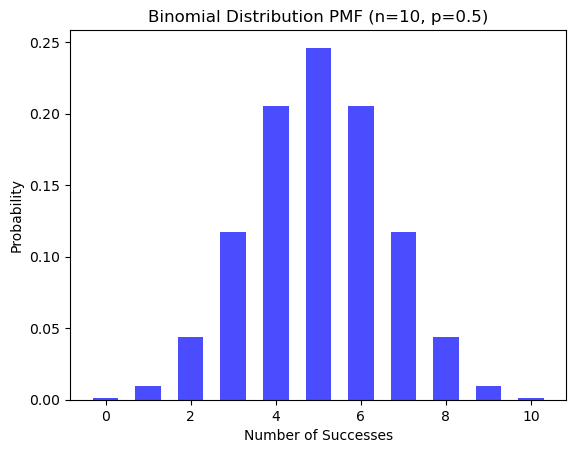

In [6]:
# binomial distribution
# 10 trials with a 0.5 probability of success
binomial = dist.Binomial(10, torch.tensor([0.5]))

# Generate the possible number of successes
x = torch.arange(0, 11, dtype=torch.float32)

# Calculate the probabilities for each number of successes
probs = binomial.probs

# Calculate the PMF (Probability Mass Function) for each number of successes
pmf = binomial.log_prob(x).exp()

# Plot the PMF
plt.bar(x.numpy(), pmf.numpy(), width=0.6, color='blue', alpha=0.7)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution PMF (n=10, p=0.5)')
plt.show()

### Important Statistics
- **Mean (Expected Value)**: $ \mu = n \cdot p $
- **Variance**: $ \sigma^2 = n \cdot p \cdot (1 - p) $
- **Standard Deviation**: $ \sigma = \sqrt{n \cdot p \cdot (1 - p)} $

In [28]:
samples = [binomial.sample() for _ in range(1000)]
print(f"Mean: {torch.mean((torch.stack(samples)))}")
print(f"Varience: {torch.var((torch.stack(samples)))}")
print(f"Standard deviation: {torch.std((torch.stack(samples)))}")

Mean: 4.988999843597412
Varience: 2.5394184589385986
Standard deviation: 1.5935553312301636
